In [1]:
import SIRmodels as mdl
import analysisSI1I2R as an
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['lines.linewidth'] = 1.5
matplotlib.rcParams['figure.titlesize'] = 22
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.titlesize'] = 18
matplotlib.rcParams['legend.fontsize'] = 18
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rc('font', family='serif')
import pickle as pkl

dirFigs = 'images/summary3/'

# SIR interactive model 

## Cooperation and competition

In [ ]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 30
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

In [ ]:
divisores = [100,0.01,1]
params = [6.15, 6.15, 5.5, 5.5, 6.15, 0, 5.5, 5.5] # independent case
beta_prime_arr = [2, 6.15, 15,40]


i=1
for div in divisores:
    j=1
    params_copy = params.copy()
    params_copy[6] = params[6]/div

    fig, ax = plt.subplots(2, 2)
    axins1 = zoomed_inset_axes(ax[0,0], 1.8, loc=1) # zoom-factor: 2.5, location: upper-right
    for beta2prime in beta_prime_arr:
        params_copy[5] = beta2prime
        siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
        siirSim.runEvaluation(norm=True)
        res = siirSim.getResult()
    
        inf1 = res[:, 1] + res[:, 3] + res[:, 7]
        rec1 = res[:, 4] + res[:, 6] + res[:, 8]
        inf2 = res[:, 2] + res[:, 3] + res[:, 6]
        rec2 = res[:, 5] + res[:, 7] + res[:, 8]

        ax[0,0].plot(t_sim, inf1,label=r"$\beta_2'$=" + str(beta2prime))
        axins1.plot(t_sim, inf1)
        ax[0,1].plot(t_sim, rec1)
        ax[1,0].plot(t_sim, inf2)
        ax[1,1].plot(t_sim, rec2)
  
    #ax[0,0].set_title(r"$P_{I_1}$")
    ax[0,0].set_xlabel(r"time")
    ax[0,0].set_ylabel(r"$P_{I_1}$")
    ax[0,0].annotate(r'\textbf{(a)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[0,0].set_xticks(np.arange(0,31,10))
    ax[0,0].set_yticks(np.arange(0,0.012,0.0025))
    ax[0,0].set_ylim(0,0.011)
    # zoom window
    axins1.set_xlim(6, 11) # apply the x-limits
    axins1.set_ylim(0.0035,0.008) # apply the y-limits
    axins1.set_xticks([6,11])
    axins1.set_yticks([0.0035,0.008])
    axins1.tick_params(labelsize=11)
    mark_inset(ax[0,0], axins1, loc1=2, loc2=3, fc="none", ec="0.5")
    
    #ax[0,1].set_title(r"$P_{R_1}$")
    ax[0,1].set_xlabel(r"time")
    ax[0,1].set_ylabel(r"$P_{R_1}$")
    ax[0,1].annotate(r'\textbf{(b)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[0,1].set_xticks(np.arange(0,31,10))
    ax[0,1].set_yticks(np.arange(0,0.26,0.05))
    #ax[1,0].set_title(r"$P_{I_2}$")
    ax[1,0].set_xlabel(r"time")
    ax[1,0].set_ylabel(r"$P_{I_2}$")
    ax[1,0].annotate(r'\textbf{(c)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[1,0].set_xticks(np.arange(0,31,10))
    ax[1,0].set_yticks(np.arange(0,0.012,0.0025))
    ax[1,0].set_ylim(0,0.011)
    
    #ax[1,1].set_title(r"$P_{R_2}$")
    ax[1,1].set_xlabel(r"time")
    ax[1,1].set_ylabel(r"$P_{R_2}$")
    ax[1,1].annotate(r'\textbf{(d)}', xy=(0.05,0.75), xycoords="axes fraction",fontsize=18)
    ax[1,1].set_xticks(np.arange(0,31,10))
    ax[1,1].set_yticks(np.arange(0,0.26,0.05))
    
    fig.legend(loc=(0.88,0.66),fontsize=12)
    fig.set_size_inches(12,5)
    fig.tight_layout(w_pad=2.5)
    plt.savefig(dirFigs + "1-" + str(i) + ".svg")
    i+=1
    


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
siirSim.getSIIR_dict()["mused"]

## B' vs B'

In [ ]:
# Cooperation
###############
# Plot: Peak
params = [6.15, 6.15, 5.5, 5.5, 6.15, 6.15, 5.5, 5.5] # independent case
peak1 = pkl.load(open("coop_peak1.pkl",'rb'))
peak2 = pkl.load(open("coop_peak2.pkl",'rb'))
inf1 = pkl.load(open("coop_inf1.pkl",'rb'))
inf2 = pkl.load(open("coop_inf2.pkl",'rb'))

betaprime_arr = np.arange(0, 20.1, 0.1)
Beta2prime, Beta1prime = np.meshgrid(betaprime_arr, betaprime_arr)

fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\beta_2'$")
ax[0].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_ylabel(r"$\beta_1'$")
ax[0].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_title(r"Cooperation-$\tau_1$")
ax[0].set_aspect('equal')
ax[0].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[0].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[0].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[0].set_xticks(np.arange(0,20.0001,5))
ax[0].set_yticks(np.arange(0,20.0001,5))
ax[0].annotate(r'\textbf{(a)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
from scipy.ndimage.filters import gaussian_filter
peak1 = gaussian_filter(peak1, 1.5)
ax[0].contour(Beta2prime, Beta1prime, peak1,5,colors='k')
cf1 = ax[0].contourf(Beta2prime, Beta1prime, peak1, np.arange(8.373,8.58,0.002))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.375,8.575,5))
cb1.set_label(r'$\tau_1$',rotation=0,labelpad=12)
cb1.solids.set_edgecolor("face")

# This is the fix for the white lines between contour levels
for c in cf1.collections:
    c.set_edgecolor("face")

# Plot: infected
ax[1].set_xlabel(r"$\beta_2'$")
ax[1].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_ylabel(r"$\beta_1'$")
ax[1].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_title(r"Cooperation-$P_{R_{1}\infty}$")
ax[1].set_aspect('equal')
ax[1].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[1].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[1].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[1].set_xticks(np.arange(0,20.0001,5))
ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(b)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
#ax.plot(beta2_arr, params[0] * np.ones(len(beta2_arr)), '-r') 
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
ax[1].contour(Beta2prime, Beta1prime, inf1,5,colors='k')
cf1 = ax[1].contourf(Beta2prime, Beta1prime, inf1,np.arange(0.19,0.275,0.0008))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(0.19,0.275,5))
cb1.set_label(r'$P_{R_{1}\infty}$',rotation=0,labelpad=25)
cb1.solids.set_edgecolor("face")
# This is the fix for the white lines between contour levels
for c in cf1.collections:
    c.set_edgecolor("face")

fig.set_size_inches(12, 5)
fig.tight_layout(w_pad=3.5)
plt.savefig(dirFigs+'2-1.svg')




In [ ]:
# Tau1 vs Tau2 Cooperation

fig,ax = plt.subplots(1,1)

peak1_arr = peak1.ravel()
peak2_arr = peak2.ravel()

ax.plot(peak1_arr,peak2_arr,'.')
fig.savefig(dirFigs + 'tau.svg')

In [ ]:
# Competitive
##############

peak1 = pkl.load(open("comp_peak1.pkl",'rb'))
peak2 = pkl.load(open("comp_peak2.pkl",'rb'))
inf1 = pkl.load(open("comp_inf1.pkl",'rb'))
inf2 = pkl.load(open("comp_inf2.pkl",'rb'))


# Plot: Peak
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\beta_2'$")
ax[0].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_ylabel(r"$\beta_1'$")
ax[0].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[0].set_title(r"Competition-$\tau_1$")
ax[0].set_aspect('equal')
ax[0].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[0].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[0].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[0].annotate(r'\textbf{(c)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
from scipy.ndimage.filters import gaussian_filter
peak1 = gaussian_filter(peak1, 1.5)
ax[0].contour(Beta2prime, Beta1prime, peak1,5,colors='k')
cf1 = ax[0].contourf(Beta2prime, Beta1prime, peak1, np.arange(8.04,8.40,0.003))
ax[0].set_xticks(np.arange(0,20.0001,5))
ax[0].set_yticks(np.arange(0,20.0001,5))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.04,8.4,5))
cb1.set_label(r'$\tau_1$',rotation=0,labelpad=12)
cb1.solids.set_edgecolor("face")
for c in cf1.collections:
    c.set_edgecolor("face")
    
    
# Plot: infected
ax[1].set_xlabel(r"$\beta_2'$")
ax[1].set_xlim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_ylabel(r"$\beta_1'$")
ax[1].set_ylim(np.min(betaprime_arr),np.max(betaprime_arr))
ax[1].set_title(r"Competition-$P_{R_{1}\infty}$")
ax[1].set_aspect('equal')
ax[1].plot(betaprime_arr, params[0] * np.ones(len(betaprime_arr)), '-r',linewidth=2.5)
ax[1].plot(params[0] * np.ones(len(betaprime_arr)), betaprime_arr, '-.r',linewidth=2.5)
ax[1].legend((r"$\beta_1'=\beta_1$", r"$\beta_2'=\beta_2$"), fontsize=18)
ax[1].set_xticks(np.arange(0,20.0001,5))
ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(d)}', xy=(0.03,0.85), xycoords="axes fraction",fontsize=18)
#ax.plot(beta2_arr, params[0] * np.ones(len(beta2_arr)), '-r') 
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
ax[1].contour(Beta2prime, Beta1prime, inf1,5,colors='k')
cf1 = ax[1].contourf(Beta2prime, Beta1prime, inf1,np.arange(0.177,0.201,0.00023))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_label(r'$P_{R_{1}\infty}$',rotation=0,labelpad=25)
cb1.solids.set_edgecolor("face")
cb1.set_ticks(np.linspace(0.177,0.201,5,5))
for c in cf1.collections:
    c.set_edgecolor("face")

fig.set_size_inches(12, 5)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs + "2-2.svg")

In [ ]:
#params = [6.15, 6.15, 5.5, 5.5, 0, 0, 5.5/100, 5.5] # cooperative case
params = [6.15, 6.15, 5.5, 5.5, 0, 0, 5.5/0.01, 5.5] # competitive case

# Peak
#######
betaprime_arr = np.arange(0, 20.1, 0.1)
params_copy = params.copy()
Beta2prime, Beta1prime = np.meshgrid(betaprime_arr, betaprime_arr)

peak1 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
peak2 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
inf1 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
inf2 = np.zeros((len(betaprime_arr), len(betaprime_arr)))
for j in np.arange(len(betaprime_arr)):
    beta2prime = betaprime_arr[j]
    params_copy[5] = beta2prime
    for i in np.arange(len(betaprime_arr)):
        beta1prime = betaprime_arr[i]
        print("(beta1prime,beta2prime)", beta1prime, beta2prime)
        params_copy[4] = beta1prime
        siir = mdl.SIIR(SIIR0, params_copy, t_sim)
        siir.runEvaluation(norm=True)
        #peak1[i, j] = t_sim[siir.getDisease1()[1]][0] # getPeak1
        #peak2[i, j] = t_sim[siir.getDisease2()[1]][0] # getPeak2
        peak1[i, j] = 0 if siir.getDisease1()[1].size==0 else t_sim[siir.getDisease1()[1]][0] # getPeak1
        peak2[i, j] = 0 if siir.getDisease2()[1].size==0 else t_sim[siir.getDisease2()[1]][0]
        inf1[i, j] = siir.getNInfected1() # n infected 1
        inf2[i, j] = siir.getNInfected2() # n infected 2

import pickle as pkl

#nameFile = "coop_" 
nameFile = "comp_" 
pkl_file = open(nameFile + 'peak1.pkl', 'wb')
pkl.dump(peak1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'peak2.pkl', 'wb')
pkl.dump(peak2,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf1.pkl', 'wb')
pkl.dump(inf1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf2.pkl', 'wb')
pkl.dump(inf2,pkl_file)
pkl_file.close()


## Enhance and diminish (synch)

In [2]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 25
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

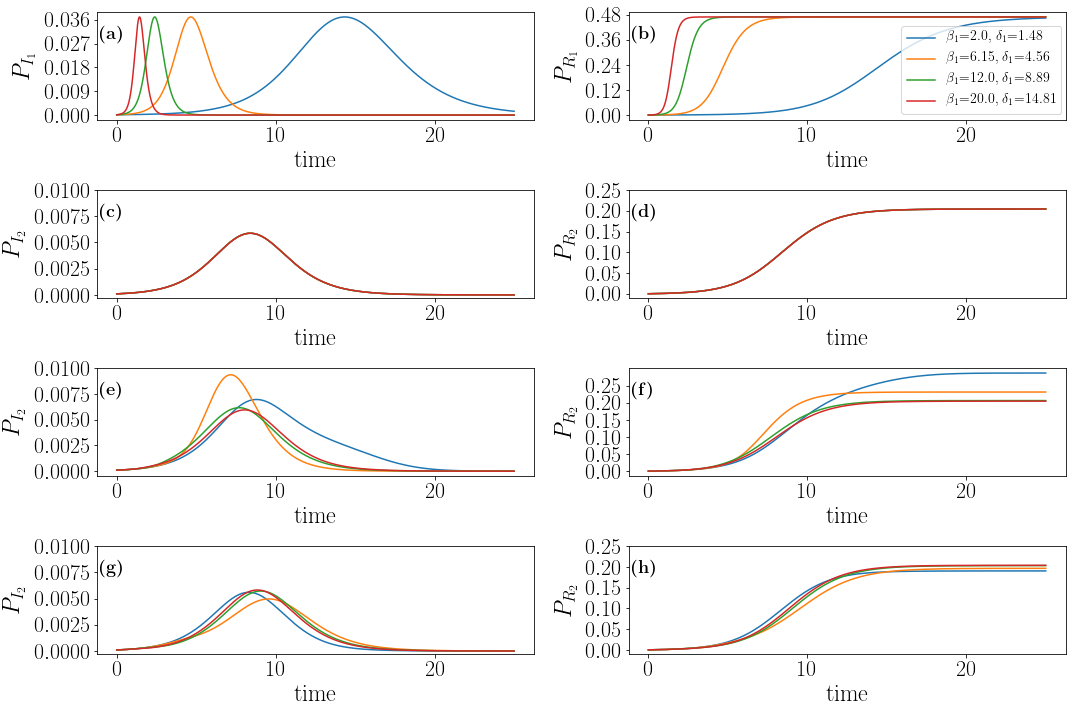

In [3]:
delta1PrimeParams = [5.5,0.3, 19.5] # [synch,asynch,ind]
params = [6.15, 0, 5.5, 0, 6.15, 0, 0, 0]  # Independent case
beta_prime_arr = np.array([2,  6.15, 12,20])
#delta_prime_arr = beta_prime_arr/1.12
delta_prime_arr = beta_prime_arr/1.35

i=1
fig, ax = plt.subplots(4, 2)
axins=[]
for delta1prime in delta1PrimeParams:
    params_copy = params.copy()
    params_copy[6] = delta1prime
    
    #axins.append(zoomed_inset_axes(ax[i,0], 2.5, loc=1)) # zoom-factor: 2.5, location: upper-right
    for j in range(len(beta_prime_arr)):
        params_copy[1] = beta_prime_arr[j]
        params_copy[5] = beta_prime_arr[j]
        params_copy[3] = delta_prime_arr[j]
        params_copy[7] = delta_prime_arr[j]
        
        siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
        siirSim.runEvaluation(norm=True)
        res = siirSim.getResult()
        
        inf1 = res[:, 1] + res[:, 3] + res[:, 7]
        rec1 = res[:, 4] + res[:, 6] + res[:, 8]
        inf2 = res[:, 2] + res[:, 3] + res[:, 6]
        rec2 = res[:, 5] + res[:, 7] + res[:, 8]
        
        ax[i,0].plot(t_sim, inf1)
        #axins[i-1].plot(t_sim, inf1)
        ax[i,1].plot(t_sim, rec1)
        if i == 1:
            ax[0,0].plot(t_sim, inf2, label=r'$\beta_1$=' + str(round(beta_prime_arr[j],2)) 
                                     + r', $\delta_1$=' + str(round(delta_prime_arr[j],2)))
            ax[0,1].plot(t_sim, rec2)
    i+=1

#ax[1,0].set_title(r"$P_{I_{2}}$")
ax[0,0].tick_params(labelsize=22)
ax[0,0].set_xlabel(r"time",fontsize=24)
ax[0,0].set_ylabel(r"$P_{I_1}$",fontsize=24)
ax[0,0].annotate(r'\textbf{(a)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[0,0].set_xticks(np.arange(0,26,10))
ax[0,0].set_yticks(np.arange(0,0.037,0.009))

#ax[1,1].set_title(r"$P_{R_{2}}$")
ax[0,1].tick_params(labelsize=22)
ax[0,1].set_xlabel(r"time",fontsize=24)
ax[0,1].set_ylabel(r"$P_{R_1}$",fontsize=24)
ax[0,1].annotate(r'\textbf{(b)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[0,1].set_xticks(np.arange(0,26,10))
ax[0,1].set_yticks(np.arange(0,0.49,0.12))

#ax[0,0].set_title(r"$P_{I_{1}}$")
ax[1,0].tick_params(labelsize=22)
ax[1,0].set_xlabel(r"time",fontsize=24)
ax[1,0].set_ylabel(r"$P_{I_2}$",fontsize=24)
ax[1,0].annotate(r'\textbf{(c)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[1,0].set_xticks(np.arange(0,26,10))
ax[1,0].set_yticks(np.arange(0,0.011,0.0025))
# zoom window
"""
axins[0].set_xlim(6.5, 10) # apply the x-limits
axins[0].set_ylim(0.0045,0.0065) # apply the y-limits
axins[0].set_xticks([6.5,10])
axins[0].set_yticks([0.0045,0.0065])
axins[0].tick_params(labelsize=13)
mark_inset(ax[1,0], axins[0], loc1=2, loc2=3, fc="none", ec="0.5")
"""

#ax[0,1].set_title(r"$P_{R_{1}}$")
ax[1,1].tick_params(labelsize=22)
ax[1,1].set_xlabel(r"time",fontsize=24)
ax[1,1].set_ylabel(r"$P_{R_{2}}$",fontsize=24)
ax[1,1].annotate(r'\textbf{(d)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[1,1].set_xticks(np.arange(0,26,10))
ax[1,1].set_yticks(np.arange(0,0.26,0.05))



#ax[0,0].set_title(r"$P_{I_{1}}$")
ax[2,0].tick_params(labelsize=22)
ax[2,0].set_xlabel(r"time",fontsize=24)
ax[2,0].set_ylabel(r"$P_{I_2}$",fontsize=24)
ax[2,0].annotate(r'\textbf{(e)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[2,0].set_xticks(np.arange(0,26,10))
ax[2,0].set_yticks(np.arange(0,0.011,0.0025))
# zoom window
"""
axins[1].set_xlim(6.5, 10) # apply the x-limits
axins[1].set_ylim(0.0055,0.0068) # apply the y-limits
axins[1].set_xticks([6.5,10])
axins[1].set_yticks([0.0055,0.008])
axins[1].tick_params(labelsize=13)
mark_inset(ax[2,0], axins[1], loc1=2, loc2=3, fc="none", ec="0.5")
"""

#ax[0,1].set_title(r"$P_{R_{1}}$")
ax[2,1].tick_params(labelsize=22)
ax[2,1].set_xlabel(r"time",fontsize=24)
ax[2,1].set_ylabel(r"$P_{R_{2}}$",fontsize=24)
ax[2,1].annotate(r'\textbf{(f)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[2,1].set_xticks(np.arange(0,26,10))
ax[2,1].set_yticks(np.arange(0,0.26,0.05))



#ax[0,0].set_title(r"$P_{I_{1}}$")
ax[3,0].tick_params(labelsize=22)
ax[3,0].set_xlabel(r"time",fontsize=24)
ax[3,0].set_ylabel(r"$P_{I_2}$",fontsize=24)
ax[3,0].annotate(r'\textbf{(g)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[3,0].set_xticks(np.arange(0,26,10))
ax[3,0].set_yticks(np.arange(0,0.011,0.0025))
# zoom window
"""
axins[2].set_xlim(6.5, 10) # apply the x-limits
axins[2].set_ylim(0.0045,0.0068) # apply the y-limits
axins[2].set_xticks([6.5,10])
axins[2].set_yticks([0.0045,0.0068])
axins[2].tick_params(labelsize=13)
mark_inset(ax[3,0], axins[2], loc1=2, loc2=3, fc="none", ec="0.5")
"""

#ax[0,1].set_title(r"$P_{R_{1}}$")
ax[3,1].tick_params(labelsize=22)
ax[3,1].set_xlabel(r"time",fontsize=24)
ax[3,1].set_ylabel(r"$P_{R_{2}}$",fontsize=24)
ax[3,1].annotate(r'\textbf{(h)}', xy=(0.005,0.75), xycoords="axes fraction",fontsize=18)
ax[3,1].set_xticks(np.arange(0,26,10))
ax[3,1].set_yticks(np.arange(0,0.26,0.05))
    
fig.legend(loc=(0.84,0.84),fontsize=14)
fig.set_size_inches(15,10)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs+ "3-1.svg") 


## B2' vs D1'

In [ ]:
# RUN JUST TO UPDATE FILES
params = [6.15, 0, 5.5, 0, 6.15, 0, 5.5, 0]
beta2_arr = np.arange(0.1,20.1,0.1)
delta1prime_arr = np.arange(0.1,20.1,0.1)
rate = 1.35
params_copy = params.copy()
Delta1prime, Beta2 = np.meshgrid(delta1prime_arr,beta2_arr)

peak1 = np.zeros((len(beta2_arr), len(delta1prime_arr)))
peak2 = np.zeros((len(beta2_arr), len(delta1prime_arr)))
inf1 = np.zeros((len(beta2_arr), len(delta1prime_arr)))
inf2 = np.zeros((len(beta2_arr), len(delta1prime_arr)))
for j in np.arange(len(delta1prime_arr)):
    delta1prime = delta1prime_arr[j]
    params_copy[6] = delta1prime
    for i in np.arange(len(beta2_arr)):
        beta2 = beta2_arr[i]
        print("(beta2,delta1prime)", beta2, delta1prime)
        params_copy[1] = beta2
        params_copy[3] = beta2/rate
        params_copy[5] = beta2
        params_copy[7] = beta2/rate
        siir = mdl.SIIR(SIIR0, params_copy, t_sim)
        siir.runEvaluation(norm=True)
        #print(t_sim[siir.getDisease2()[1]])
        peak1[i, j] =  0 if siir.getDisease1()[1].size==0 else t_sim[siir.getDisease1()[1]][0] # getPeak1
        peak2[i, j] = 0 if siir.getDisease2()[1].size==0 else t_sim[siir.getDisease2()[1]][0]
        inf1[i, j] = siir.getNInfected1() # n infected 1
        inf2[i, j] = siir.getNInfected2() # n infected 2
        
import pickle as pkl

nameFile = "synch_" 
pkl_file = open(nameFile + 'peak1.pkl', 'wb')
pkl.dump(peak1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'peak2.pkl', 'wb')
pkl.dump(peak2,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf1.pkl', 'wb')
pkl.dump(inf1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf2.pkl', 'wb')
pkl.dump(inf2,pkl_file)
pkl_file.close()

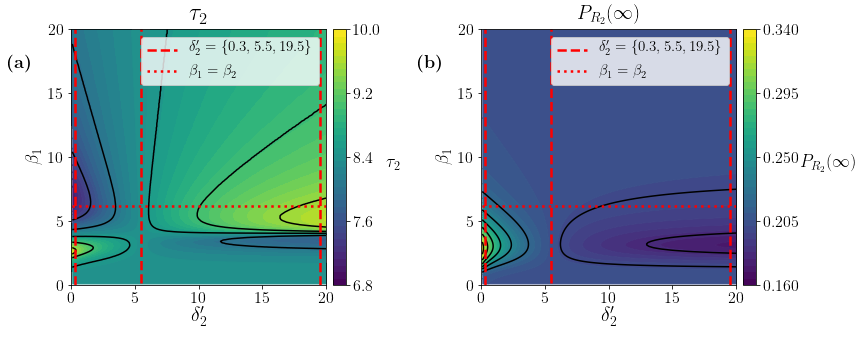

In [4]:
params = [0,6.15,0,5.5,0,6.15,0,5.5]
beta1_arr = np.arange(0.1,20.1,0.1)
delta2prime_arr = np.arange(0.1,20.1,0.1)
#rate = 1.12
rate = 1.35
Delta2prime, Beta1 = np.meshgrid(delta2prime_arr,beta1_arr)

peak2 = pkl.load(open("synch_peak1.pkl",'rb'))
peak1 = pkl.load(open("synch_peak2.pkl",'rb'))
inf2 = pkl.load(open("synch_inf1.pkl",'rb'))
inf1 = pkl.load(open("synch_inf2.pkl",'rb'))

beta_arr = np.arange(0,21,1)
deltaPrime_arr = np.array([0.3, 19.5])

fig = plt.figure()
# Plot: Peak
ax0 = plt.subplot(1,2,1)
ax0.set_xlabel(r"$\delta_2'$",fontsize=20)
ax0.set_xlim(np.min(delta2prime_arr),np.max(delta2prime_arr)+0.001)
ax0.set_ylabel(r"$\beta_1$")
ax0.set_ylim(np.min(beta1_arr),np.max(beta1_arr))
ax0.set_title(r"$\tau_2$",fontsize=24)
ax0.set_aspect('equal')
ax0.plot(params[7] * np.ones(len(beta1_arr)), beta1_arr, '--r',linewidth=2.5,
       label=r"$\delta_2'=\{0.3,5.5,19.5\}$")  
ax0.plot(delta2prime_arr, params[1] * np.ones(len(delta2prime_arr)), ':r',linewidth=2.5,
       label=r"$\beta_1=\beta_2$")  
ax0.plot(deltaPrime_arr[0]*np.ones(len(beta_arr)),beta_arr,'--r',linewidth=2.5)
ax0.plot(deltaPrime_arr[1]*np.ones(len(beta_arr)),beta_arr,'--r',linewidth=2.5)

ax0.legend(fontsize=15)
ax0.set_xticks(np.arange(0,20.0001,5))
ax0.set_yticks(np.arange(0,20.0001,5))
from scipy.ndimage.filters import gaussian_filter
peak1 = gaussian_filter(peak1, 1.5)
ax0.contour(Delta2prime, Beta1, peak2,5,colors='k')
cf1 = ax0.contourf( Delta2prime,Beta1, peak2, np.linspace(6.8,10,40))
ax0.annotate(r'\textbf{(a)}', xy=(-0.25,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax0)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(6.8,10,5))
cb1.set_label(r"$\tau_2$",rotation=0,labelpad=12)
for c in cf1.collections:
    c.set_edgecolor("face")
#ax[0].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)

# Plot: infected
ax1 = plt.subplot(1,2,2)
ax1.set_xlabel(r"$\delta_2'$",fontsize=20)
ax1.set_xlim(np.min(delta2prime_arr),np.max(delta2prime_arr))
ax1.set_ylabel(r"$\beta_1$")
ax1.set_ylim(np.min(beta1_arr),np.max(beta1_arr))
ax1.set_title(r"$P_{R_{2}}(\infty)$",fontsize=20)
ax1.set_aspect('equal')
ax1.plot(params[7] * np.ones(len(beta1_arr)), beta1_arr, '--r',linewidth=2.5,
       label=r"$\delta_2'=\{0.3,5.5,19.5\}$")
ax1.plot(delta2prime_arr, params[1] * np.ones(len(delta2prime_arr)), ':r',linewidth=2.5,
       label=r"$\beta_1=\beta_2$")  
ax1.plot(deltaPrime_arr[0]*np.ones(len(beta_arr)),beta_arr,'--r',linewidth=2.5)
ax1.plot(deltaPrime_arr[1]*np.ones(len(beta_arr)),beta_arr,'--r',linewidth=2.5)

ax1.legend(fontsize=15)
ax1.set_xticks(np.arange(0,20.0001,5))
ax1.set_yticks(np.arange(0,20.0001,5))
ax1.annotate(r'\textbf{(b)}', xy=(-0.25,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
#ax.legend(r"$\delta_1'=\delta_1$", fontsize=18)
ax1.contour(Delta2prime, Beta1, inf2,7,colors='k')
cf1 = ax1.contourf( Delta2prime,Beta1, inf2,np.linspace(0.16,0.34,40))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_label(r"$P_{R_{2}}(\infty)$",rotation=0,labelpad=30)
cb1.set_ticks(np.linspace(0.16,0.34,5))
for c in cf1.collections:
    c.set_edgecolor("face")
#ax[1].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)

fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs+"4-1.svg")

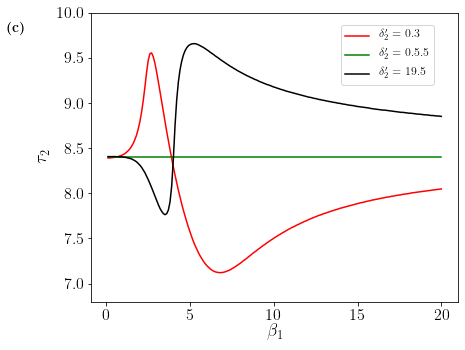

In [22]:
fig = plt.figure()
ax = plt.subplot(1,2,1)

ax.set_ylim(6.8,10)
ax.annotate(r'\textbf{(c)}', xy=(-65,280), xycoords="axes points",size=14, ha='right', va='top')
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
pos = np.where(np.isclose(delta2prime_arr,0.3))[0][0]
ax.plot(beta1_arr,peak2[:,pos],'r',label=r"$\delta_2'=0.3$")
pos = np.where(np.isclose(delta2prime_arr,5.5))[0][0]
ax.plot(beta1_arr,peak2[:,pos],'g',label=r"$\delta_2'=0.5$")
pos = np.where(np.isclose(delta2prime_arr,19.5))[0][0]
ax.plot(beta1_arr,peak2[:,pos],'k',label=r"$\delta_2'=19.5$")

#Widx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
#ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.68,0.75),fontsize=12)

fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)

#plt.savefig(dirFigs+"4-2.svg")
plt.show()

#ax.plot(beta1_arr,inf1[pos])

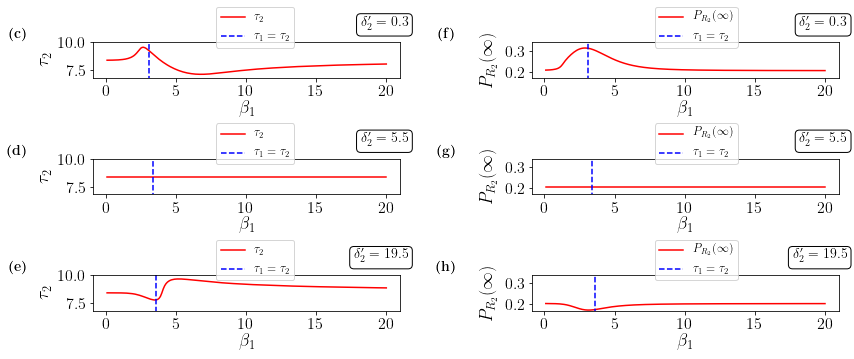

In [5]:
fig = plt.figure()
ax = plt.subplot(3,2,1)
pos = np.where(np.isclose(delta2prime_arr,0.3))[0][0]
ax.set_ylim(6.8,10)
ax.annotate(r"$\delta_2'=0.3$", xy=(315,60), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(c)}', xy=(-65,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
#ax.set_xticks(np.linspace(0,20,5))
#ax.set_yticks(np.linspace(8.12,8.68,2))
ax.plot(beta1_arr,peak2[:,pos],'r',label=r'$\tau_2$')
#ax.plot(beta1_arr,peak1[:,pos],'b')
#ax.plot(peak1[:,pos],beta1_arr,'r')
idx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.4,0.85),fontsize=12)

ax = plt.subplot(3,2,3)
pos = np.where(np.isclose(delta2prime_arr,5.5))[0][0]
ax.set_ylim(6.8,10)
ax.annotate(r"$\delta_2'=5.5$", xy=(315,60), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(d)}', xy=(-65,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
#ax.set_xticks(np.linspace(0,20,5))
#ax.set_yticks(np.linspace(8.12,8.68,2))
ax.plot(beta1_arr,peak2[:,pos],'r',label=r'$\tau_2$')
#ax.plot(beta1_arr[30:],peak2[30:,pos],'b')
#ax.plot(peak1[:,pos],beta1_arr,'r')
idx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.4,0.85),fontsize=12)


ax = plt.subplot(3,2,5)
pos = np.where(np.isclose(delta2prime_arr,19.5))[0][0]
ax.annotate(r"$\delta_2'=19.5$", xy=(315,60), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(e)}', xy=(-65,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_ylim(6.8,10)
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
#ax.set_xticks(np.linspace(0,20,5))
#ax.set_yticks(np.linspace(8.12,8.68,2))
ax.plot(beta1_arr,peak2[:,pos],'r',label=r'$\tau_2$')
#ax.plot(beta1_arr[30:],peak2[30:,pos],'b')
#ax.plot(peak1[:,pos],beta1_arr,'r')
idx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.4,0.85),fontsize=12)


ax = plt.subplot(3,2,2)
pos = np.where(np.isclose(delta2prime_arr,0.3))[0][0]
ax.annotate(r"$\delta_2'=0.3$", xy=(315,60), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(f)}', xy=(-75,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_ylim(0.17,0.34)
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$P_{R_{2}}(\infty)$")
#ax.set_xticks(np.linspace(0,20,5))
#ax.set_yticks(np.linspace(0.196,0.22,2))
ax.plot(beta1_arr,inf2[:,pos],'r',label=r'$P_{R_{2}}(\infty)$')
#ax.plot(inf1[:,pos],beta1_arr,'r')
idx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.4,0.85),fontsize=12)


ax = plt.subplot(3,2,4)
pos = np.where(np.isclose(delta2prime_arr,5.5))[0][0]
ax.set_ylim(0.17,0.34)
ax.annotate(r"$\delta_2'=5.5$", xy=(315,60), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(g)}', xy=(-75,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$P_{R_{2}}(\infty)$")
#ax.set_xticks(np.linspace(0,20,5))
#ax.set_yticks(np.linspace(0.196,0.22,2))
ax.plot(beta1_arr,inf2[:,pos],'r',label=r'$P_{R_{2}}(\infty)$')
#ax.plot(inf1[:,pos],beta1_arr,'r')
idx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.4,0.85),fontsize=12)


ax = plt.subplot(3,2,6)
pos = np.where(np.isclose(delta2prime_arr,19.5))[0][0]
ax.set_ylim(0.17,0.34)
ax.annotate(r"$\delta_2'=19.5$", xy=(315,60), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(h)}', xy=(-75,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$P_{R_{2}}(\infty)$")
#ax.set_xticks(np.linspace(0,20,5))
#ax.set_yticks(np.linspace(0.196,0.22,2))
ax.plot(beta1_arr,inf2[:,pos],'r',label=r'$P_{R_{2}}(\infty)$')
#ax.plot(inf1[:,pos],beta1_arr,'r')
idx = (np.argwhere(np.diff(np.sign(peak2[20:,pos] - peak1[20:,pos]))).flatten()+20)[0]
ax.plot(np.ones(100)*beta1_arr[idx],np.arange(0,10,0.1)*peak2[idx,pos],'--b',label=r'$\tau_1=\tau_2$')
ax.legend(loc=(0.4,0.85),fontsize=12)


fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)

plt.savefig(dirFigs+"4-2.svg")
plt.show()

#ax.plot(beta1_arr,inf1[pos])

In [ ]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
pos = np.where(np.isclose(delta2prime_arr,19.5))[0][0]
ax.annotate(r"$\delta_2'=0.3$", xy=(315,70), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.annotate(r'\textbf{(c)}', xy=(-65,50), xycoords="axes points",size=14, ha='right', va='top')
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
ax.set_xticks(np.linspace(0,20,5))
ax.set_yticks(np.linspace(8.12,8.68,2))
ax.plot(beta1_arr,peak1[:,pos],'r')
ax.plot(beta1_arr,peak2[:,pos],'b')
#ax.plot(peak1[:,pos],beta1_arr,'r')

In [ ]:
fig = plt.figure()
ax = plt.subplot(2,3,1)
pos = np.where(np.isclose(delta2prime_arr,0.3))[0][0]
ax.set_xlim(8.12,8.68)
ax.annotate(r"$\delta_2'=0.3$", xy=(320,50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
#ax.plot(beta1_arr,peak1[:,pos],'r')
ax.plot(peak1[:,pos],beta1_arr,'r')

ax = plt.subplot(3,2,3)
pos = np.where(np.isclose(delta2prime_arr,5.5))[0][0]
ax.set_xlim(8.12,8.68)
ax.annotate(r"$\delta_2'=5.5$", xy=(320,50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
#ax.plot(beta1_arr,peak1[:,pos],'r')
ax.plot(peak1[:,pos],beta1_arr,'r')

ax = plt.subplot(3,2,5)
pos = np.where(np.isclose(delta2prime_arr,19.5))[0][0]
ax.annotate(r"$\delta_2'=19.5$", xy=(320,50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.set_xlim(8.12,8.68)
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$\tau_2$")
#ax.plot(beta1_arr,peak1[:,pos],'r')
ax.plot(peak1[:,pos],beta1_arr,'r')

ax = plt.subplot(3,2,2)
pos = np.where(np.isclose(delta2prime_arr,0.3))[0][0]
ax.annotate(r"$\delta_2'=0.3$", xy=(320,50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.set_xlim(0.196,0.226)
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$P_{R_{2}(\infty)}$")
#ax.plot(beta1_arr,inf1[:,pos],'r')
ax.plot(inf1[:,pos],beta1_arr,'r')

ax = plt.subplot(3,2,4)
pos = np.where(np.isclose(delta2prime_arr,5.5))[0][0]
ax.set_xlabel(r"$\beta_1$")
ax.set_xlim(0.196,0.226)
ax.annotate(r"$\delta_2'=5.5$", xy=(320,50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$P_{R_{2}(\infty)}$")
#ax.plot(beta1_arr,inf1[:,pos],'r')
ax.plot(inf1[:,pos],beta1_arr,'r')

ax = plt.subplot(3,2,6)
pos = np.where(np.isclose(delta2prime_arr,19.5))[0][0]
ax.set_xlim(0.196,0.226)
ax.annotate(r"$\delta_2'=19.5$", xy=(320,50), xycoords='axes points',
            size=14, ha='right', va='top',
            bbox=dict(boxstyle='round', fc='w'))
ax.set_xlabel(r"$\beta_1$")
ax.set_ylabel(r"$P_{R_{2}(\infty)}$")
#ax.plot(beta1_arr,inf1[:,pos],'r')
ax.plot(inf1[:,pos],beta1_arr,'r')


fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)

plt.savefig(dirFigs+"4-2.svg")
plt.show()

#ax.plot(beta1_arr,inf1[pos])

In [ ]:
np.where(np.isclose(delta2prime_arr,0.3))

In [ ]:
params = [6.15, 0, 5.5, 0, 6.15, 0, 5.5, 0]
beta2_arr = np.arange(0.1,20.1,0.1)
delta1prime_arr = np.arange(0.1,20.1,0.1)
rate = 1.12
Delta1prime, Beta2 = np.meshgrid(delta1prime_arr,beta2_arr)

peak1 = pkl.load(open("synch_peak1.pkl",'rb'))
peak2 = pkl.load(open("synch_peak2.pkl",'rb'))
inf1 = pkl.load(open("synch_inf1.pkl",'rb'))
inf2 = pkl.load(open("synch_inf2.pkl",'rb'))

# Plot: Peak
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\delta_2'$",fontsize=20)
ax[0].set_xlim(np.min(delta1prime_arr),np.max(delta1prime_arr)+0.001)
ax[0].set_ylabel(r"$\beta_1$")
ax[0].set_ylim(np.min(beta2_arr),np.max(beta2_arr))
ax[0].set_title(r"$\tau_2$",fontsize=24)
ax[0].set_aspect('equal')
ax[0].plot(params[6] * np.ones(len(beta2_arr)), beta2_arr, '-.r',linewidth=2.5,
       label=r"$\delta_2'=\delta_2$")  
ax[0].plot(delta1prime_arr, params[0] * np.ones(len(delta1prime_arr)), '--r',linewidth=2.5,
       label=r"$\beta_1=\beta_2$")  
ax[0].legend(fontsize=18)
ax[0].set_xticks(np.arange(0,20.0001,5))
ax[0].set_yticks(np.arange(0,20.0001,5))
from scipy.ndimage.filters import gaussian_filter
peak2 = gaussian_filter(peak2, 1.5)
ax[0].contour(Delta1prime, Beta2, peak2,5,colors='k')
cf1 = ax[0].contourf( Delta1prime,Beta2, peak2, np.arange(8.12,8.68,0.005))
ax[0].annotate(r'\textbf{(a)}', xy=(0.1,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.120,8.68,5))
cb1.set_label(r"$\tau_2$",rotation=0,labelpad=12)
for c in cf1.collections:
    c.set_edgecolor("face")
#ax[0].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)

# Plot: infected
ax[1].set_xlabel(r"$\delta_2'$",fontsize=20)
ax[1].set_xlim(np.min(delta1prime_arr),np.max(delta1prime_arr))
ax[1].set_ylabel(r"$\beta_1$")
ax[1].set_ylim(np.min(beta2_arr),np.max(beta2_arr))
ax[1].set_title(r"$P_{R_{2}(\infty)}$",fontsize=20)
ax[1].set_aspect('equal')
ax[1].plot(params[6] * np.ones(len(beta2_arr)), beta2_arr, '-.r',linewidth=2.5,
       label=r"$\delta_2'=\delta_2$")
ax[1].plot(delta1prime_arr, params[0] * np.ones(len(delta1prime_arr)), '--r',linewidth=2.5,
       label=r"$\beta_1=\beta_2$")  
ax[1].legend(fontsize=18)
ax[1].set_xticks(np.arange(0,20.0001,5))
ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(b)}', xy=(0.1,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
#ax.legend(r"$\delta_1'=\delta_1$", fontsize=18)
ax[1].contour(Delta1prime, Beta2, inf2,5,colors='k')
cf1 = ax[1].contourf( Delta1prime,Beta2, inf2, np.arange(0.196,0.2265,0.0003))
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_label(r"$P_{R_{2}(\infty)}$",rotation=0,labelpad=25)
cb1.set_ticks(np.linspace(0.196,0.226,5))
for c in cf1.collections:
    c.set_edgecolor("face")
#ax[1].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)


fig.set_size_inches(12,5)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs+"4-1.svg")

In [ ]:
# TRY PLOT 2D PLOT TAU2 VS DELTA1' VS TAU1/PR1_INFTY
params = [6.15, 0, 5.5, 0, 6.15, 0, 5.5, 0]
beta2_arr = np.arange(0,20.1,0.1)
delta1prime_arr = np.arange(0,20.1,0.1)
rate = 1.12
Delta1prime, Beta2 = np.meshgrid(delta1prime_arr,beta2_arr)

peak1 = pkl.load(open("synch_peak1.pkl",'rb'))
peak2 = pkl.load(open("synch_peak2.pkl",'rb'))
inf1 = pkl.load(open("synch_inf1.pkl",'rb'))
inf2 = pkl.load(open("synch_inf2.pkl",'rb'))

# Plot: Peak
fig, ax = plt.subplots(1, 1)
ax.set_xlabel(r"$\tau_1'$",fontsize=20)
#ax[0].set_xlim(np.min(delta1prime_arr),np.max(delta1prime_arr)+0.001)
ax.set_ylabel(r"$\tau_2$")
#ax[0].set_ylim(np.min(beta2_arr),np.max(beta2_arr))
ax.set_title(r"$P_{R_{1}\infty}$",fontsize=24)
ax.set_aspect('equal')
#ax[0].plot(params[6] * np.ones(len(delta1prime_arr)), delta1prime_arr, '-.r',linewidth=2.5,
#       label=r"$\delta_1'=\delta_1$")  
ax.legend(fontsize=18)
#ax[0].set_xticks(np.arange(0,20.0001,5))
#ax[0].set_yticks(np.arange(0,20.0001,5))
from scipy.ndimage.filters import gaussian_filter
#peak1 = gaussian_filter(peak1, 1.5)
ax.contour(peak1, peak2, inf1,5,colors='k')
cf1 = ax.contourf( peak1, peak2, inf1)
#ax[0].annotate(r'\textbf{(a)}', xy=(0.1,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
#cb1.set_ticks(np.linspace(8.120,8.68,5))
#cb1.set_label(r"$\tau_1$",rotation=0,labelpad=12)
#for c in cf1.collections:
#    c.set_edgecolor("face")
#ax[0].plot([0.3],[5.5],'or',[params[2]],[5.5],'xw',[19.5],[5.5],'sy', ms=10)

#fig.set_size_inches(12,5)
#fig.tight_layout(w_pad=2.5)
#plt.savefig(dirFigs+"4-1.svg")
plt.show()

## Tau1 vs delta2'

In [ ]:
params = [0, 6.15, 0, 5.5, 0, 6.15, 0, 5.5]
beta1_arr = np.arange(0.1,20.1,0.1)
delta2prime_arr = np.arange(0.1,20.1,0.1)
rate = 1.12
params_copy = params.copy()
Delta2prime, Beta1 = np.meshgrid(delta2prime_arr,beta1_arr)

peak1 = np.zeros((len(beta1_arr), len(delta2prime_arr)))
peak2 = np.zeros((len(beta1_arr), len(delta2prime_arr)))
inf1 = np.zeros((len(beta1_arr), len(delta2prime_arr)))
inf2 = np.zeros((len(beta1_arr), len(delta2prime_arr)))
for j in np.arange(len(delta2prime_arr)):
    delta2prime = delta2prime_arr[j]
    params_copy[7] = delta2prime
    for i in np.arange(len(beta1_arr)):
        beta1 = beta1_arr[i]
        print("(beta1,delta2prime)", beta1, delta2prime)
        params_copy[0] = beta1
        params_copy[2] = beta1/rate
        params_copy[4] = beta1
        params_copy[6] = beta1/rate
        siir = mdl.SIIR(SIIR0, params_copy, t_sim)
        siir.runEvaluation(norm=True)
        #print(t_sim[siir.getDisease2()[1]])
        peak1[i, j] =  0 if siir.getDisease1()[1].size==0 else t_sim[siir.getDisease1()[1]][0] # getPeak1
        peak2[i, j] = 0 if siir.getDisease2()[1].size==0 else t_sim[siir.getDisease2()[1]][0]
        inf1[i, j] = siir.getNInfected1() # n infected 1
        inf2[i, j] = siir.getNInfected2() # n infected 2
        
import pickle as pkl

nameFile = "synch_" 
pkl_file = open(nameFile + 'peak1.pkl', 'wb')
pkl.dump(peak1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'peak2.pkl', 'wb')
pkl.dump(peak2,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf1.pkl', 'wb')
pkl.dump(inf1,pkl_file)
pkl_file.close()
pkl_file = open(nameFile + 'inf2.pkl', 'wb')
pkl.dump(inf2,pkl_file)
pkl_file.close()

In [ ]:
peak1 = pkl.load(open("synch_peak1.pkl",'rb')) 
peak2 = pkl.load(open("synch_peak2.pkl",'rb'))
inf1 = pkl.load(open("synch_inf1.pkl",'rb'))
inf2 = pkl.load(open("synch_inf2.pkl",'rb'))

print(peak1[34:,0]>0)

In [ ]:
params = [0, 6.15, 0, 5.5, 0, 6.15, 0, 5.5]
#beta1_arr = np.arange(0.1,20.1,0.1)
delta2prime_arr = np.arange(0.1,20.1,0.1)
rate = 1.12


peak1 = pkl.load(open("synch_peak1.pkl",'rb')) # Exchange disease 1 with disease 2 
peak2 = pkl.load(open("synch_peak2.pkl",'rb'))
inf1 = pkl.load(open("synch_inf1.pkl",'rb'))
inf2 = pkl.load(open("synch_inf2.pkl",'rb'))


tau1 = peak1[34:,0]
peak2 = peak2[34:,:]
inf2 = inf2[34:,:]
Delta2prime, Tau1 = np.meshgrid(delta2prime_arr,tau1)

# Plot: Peak
fig, ax = plt.subplots(1, 2)
ax[0].set_xlabel(r"$\delta_2'$",fontsize=20)
ax[0].set_xlim(np.min(delta2prime_arr),np.max(delta2prime_arr)+0.001)
ax[0].set_ylabel(r"$\tau_1$")
ax[0].set_ylim(np.min(tau1),np.max(tau1))
ax[0].set_title(r"$\tau_2$",fontsize=24)
ax[0].set_aspect('equal')
ax[0].plot(params[7] * np.ones(len(delta2prime_arr)), delta2prime_arr, '-.r',linewidth=2.5,
       label=r"$\delta_2'=\delta_2$")  
ax[0].legend(fontsize=18)
#ax[0].set_xticks(np.arange(0,20.0001,5))
#ax[0].set_yticks(np.arange(0,20.0001,5))
from scipy.ndimage.filters import gaussian_filter
peak2 = gaussian_filter(peak2, 1.5)
ax[0].contour(Delta2prime, Tau1, peak2,5,colors='k')
cf1 = ax[0].contourf( Delta2prime,Tau1, peak2)
ax[0].annotate(r'\textbf{(a)}', xy=(0.15,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_ticks(np.linspace(8.120,8.68,5))
cb1.set_label(r"$\tau_2$",rotation=0,labelpad=12)
for c in cf1.collections:
    c.set_edgecolor("face")
ax[0].plot([0.3],[5.5],'or',[params[3]],[5.5],'xw',[19.5],[5.5],'sg', ms=10)

# Plot: infected
ax[1].set_xlabel(r"$\delta_2'$",fontsize=20)
ax[1].set_xlim(np.min(delta2prime_arr),np.max(delta2prime_arr)+0.001)
ax[1].set_ylabel(r"$\tau_1$")
ax[1].set_ylim(np.min(tau1),np.max(tau1))
ax[1].set_title(r"$P_{R_{2}(\infty)}$",fontsize=20)
ax[1].set_aspect('equal')
ax[1].plot(params[7] * np.ones(len(delta2prime_arr)), delta2prime_arr, '-.r',linewidth=2.5,
       label=r"$\delta_2'=\delta_2$")
ax[1].legend(fontsize=18)
#ax[1].set_xticks(np.arange(0,20.0001,5))
#ax[1].set_yticks(np.arange(0,20.0001,5))
ax[1].annotate(r'\textbf{(b)}', xy=(0.15,0.85), xycoords="axes fraction",fontsize=18)
#ax[0].legend(('Beta1', 'Beta2'), fontsize=fontsize)
#ax.legend(r"$\delta_1'=\delta_1$", fontsize=18)
ax[1].contour(Delta2prime, Tau1, inf2,5,colors='k')
cf1 = ax[1].contourf(Delta2prime, Tau1, inf2)
#ax[0].contour(Beta1prime, Beta2prime, peak1, 10, colors='black')
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(cf1, cax=cax)
cb1.set_label(r"$P_{R_{2}(\infty)}$",rotation=0,labelpad=25)
cb1.set_ticks(np.linspace(0.196,0.226,5))
for c in cf1.collections:
    c.set_edgecolor("face")
ax[1].plot([0.3],[5.5],'or',[params[3]],[5.5],'xw',[19.5],[5.5],'sg', ms=10)


fig.set_size_inches(12,4)
fig.tight_layout(w_pad=2.5)
plt.savefig(dirFigs+"4-1.svg")

## Parameter explanation

In [ ]:
# Originals values
N = 100000
SIIR0 = np.zeros(9)
SIIR0[1] = 10
SIIR0[2] = 10
SIIR0[0] = N - np.sum(SIIR0[1:8])

t_start = 0
t_end = 15
n_int = 100000

t_sim = np.linspace(t_start, t_end, n_int)

In [ ]:
delta1PrimeParams = [0.3, 19.5, 5.5] # [synch,asynch,ind]
params = [0,1,0,1,0,1,0,1]  # Independent case
beta_prime_arr = np.array([5, 10])
delta_prime_arr = beta_prime_arr/1.12

params_copy = params.copy()

fig, ax = plt.subplots(1,2)
peak = []
timePeak = []
for j in range(len(beta_prime_arr)):
    params_copy[0] = beta_prime_arr[j]
    params_copy[4] = beta_prime_arr[j]
    params_copy[2] = delta_prime_arr[j]
    params_copy[6] = delta_prime_arr[j]

    siirSim = mdl.SIIR(SIIR0, params_copy, t_sim)
    siirSim.runEvaluation(norm=True)
    res = siirSim.getResult()

    inf1 = res[:, 1] + res[:, 3] + res[:, 7]
    rec1 = res[:, 4] + res[:, 6] + res[:, 8]

    peak.append(siirSim.getDisease1()[0][siirSim.getDisease1()[1]])
    timePeak.append(0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0])
    ax[0].plot(t_sim, siirSim.getDisease1()[0],'k')
    ax[0].scatter([0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0]],
             [siirSim.getDisease1()[0][siirSim.getDisease1()[1]]], marker='o', color='red')
    ax[0].vlines(0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0],
              0, siirSim.getDisease1()[0][siirSim.getDisease1()[1]], lw=2, color='r',
             linestyles='dashed')
    

    
ax[0].set_xticks(timePeak)
ax[0].text(timePeak[0]+0.00003, peak[0]+0.00003, r"$P_{I_2 \textrm{max}}$", fontsize=16)
ax[0].text(timePeak[1]+0.00003, peak[1]+0.00003, r"$P_{I_1 \textrm{max}}$", fontsize=16)
#ax.text(timePeak[1]+0.3, peak[1]+0.3, "hola", fontsize=9)
ax[0].set_xticklabels([r'$\tau_2$',r'$\tau_1$'], fontsize=20)
#ax[0].set_xlabel(r"time")
ax[0].set_title(r"$P_I$",fontsize=20)
ax[0].set_yticks([])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].annotate(s='', xy=(timePeak[0],peak[0]), xytext=(timePeak[1],peak[1]), arrowprops=dict(arrowstyle='<->'))

ax[1].plot(t_sim,rec1,'k')
ax[1].hlines(rec1[-1]+0.001,0,18,color='r',
             linestyles='dashed')
ax[1].set_title(r"$P_R$",fontsize=20)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].text(0, rec1[-1]+0.005, r"$P_{R1 \infty }$", fontsize=17)

fig.set_size_inches(10,5)
fig.tight_layout(w_pad=2.5)
fig.savefig(dirFigs + '/5-1.svg')

In [ ]:
t_start = 0
t_end = 18
n_int = 10000

t_sim = np.linspace(t_start, t_end, n_int)

b1=6
b2=10
params = [b1,b2,b1/1.12,b2/1.15,b1,b2,b1/1.12,b2/1.15]  # Independent case

siirSim = mdl.SIIR(SIIR0, params, t_sim)
siirSim.runEvaluation(norm=True)
res = siirSim.getResult()

inf1 = res[:, 1] + res[:, 3] + res[:, 7]
rec1 = res[:, 4] + res[:, 6] + res[:, 8]
inf2 = res[:, 2] + res[:, 3] + res[:, 6]
rec2 = res[:, 5] + res[:, 7] + res[:, 8]
# Interactive case
params2 = [b1,b2,b1/1.12,b2/1.15,0,b2,1000,b2/1.15]  # Non Independent case

siirSim2 = mdl.SIIR(SIIR0, params2, t_sim)
siirSim2.runEvaluation(norm=True)
res2 = siirSim2.getResult()

inf1_2 = res2[:, 1] + res2[:, 3] + res2[:, 7]
rec1_2 = res2[:, 4] + res2[:, 6] + res2[:, 8]
inf2_2 = res2[:, 2] + res2[:, 3] + res2[:, 6]
rec2_2 = res2[:, 5] + res2[:, 7] + res2[:, 8]



fig, ax = plt.subplots(2,1)
peak = []
timePeak = []


peak.append(siirSim.getDisease1()[0][siirSim.getDisease1()[1]])
peak.append(siirSim.getDisease2()[0][siirSim.getDisease2()[1]])
peak.append(siirSim2.getDisease1()[0][siirSim2.getDisease1()[1]])

timePeak.append(0 if siirSim.getDisease1()[1].size==0 else t_sim[siirSim.getDisease1()[1]][0])
timePeak.append(0 if siirSim.getDisease2()[1].size==0 else t_sim[siirSim.getDisease2()[1]][0])
timePeak.append(0 if siirSim2.getDisease1()[1].size==0 else t_sim[siirSim2.getDisease1()[1]][0]+0.25)


ax[0].plot(t_sim, siirSim.getDisease2()[0],'g',label=r"$P_{I_1}^\mathrm{^0} (t)$")
ax[0].vlines(timePeak[1]+0.02,0, peak[1], lw=2, color='g',linestyles='dashed')
ax[0].scatter([timePeak[1]],[peak[1]], marker='o', color='red',zorder=3)

ax[0].plot(t_sim, siirSim.getDisease1()[0],'b',label=r"$P_{I_2}^\mathrm{^0} (t)$")
ax[0].vlines(timePeak[0]+0.02,0, peak[0], lw=2, color='b',linestyles='dashed')
ax[0].scatter([timePeak[0]],[peak[0]], marker='o', color='red',zorder=3)

ax[0].plot(t_sim, siirSim2.getDisease1()[0],'k',label=r"$P_{I_2} (t)$")
ax[0].vlines(timePeak[2]+0.02,0, peak[2], lw=2, color='k',linestyles='dashed')
ax[0].scatter([timePeak[2]],[peak[2]], marker='o', color='red',zorder=3)


ax[0].set_xticks(timePeak)
ax[0].text(timePeak[0]-1.8, peak[0]+0.0005, r"$P_{I_{2},\mathrm{max}}^\mathrm{^0}$", fontsize=20)
ax[0].text(timePeak[1]-1.5, peak[1]+0.0005, r"$P_{I_{1},\mathrm{max}}^\mathrm{^0}$", fontsize=20)
ax[0].text(timePeak[2]-0.5, peak[2]+0.0005, r"$P_{I_{2},\mathrm{max}}$", fontsize=20)
ax[0].set_xticklabels([r'$\tau_{2}^\mathrm{^0}$',r'$\tau_{1}^\mathrm{^0}$',r'$\tau_2$'], fontsize=23)
ax[0].set_yticks([])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].xaxis.set_label_coords(0.99,-0.01)
ax[0].yaxis.set_label_coords(0,0.99)
ax[0].set_ylabel(r"$P_I$",fontsize=35)
ax[0].set_xlabel(r"$t$",fontsize=35)
ax[0].set_ylim(0,0.0095)
ax[0].legend(loc=(0.7,0.25),fontsize=20)

ax[1].plot(t_sim,rec1,'b')
ax[1].plot(t_sim,rec2,'g')
ax[1].plot(t_sim,rec1_2,'k')
ax[1].hlines(rec1[-1]+0.001,0,18,color='r',
             linestyles='dashed')
ax[1].hlines(rec2[-1]+0.001,0,18,color='r',
             linestyles='dashed')
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].text(0, rec1[-1]-0.08, r"$P_{R_2}^\mathrm{^0} (\infty) $", fontsize=20)
ax[1].text(0, rec2[-2]+0.015, r"$P_{R_1}^\mathrm{^0} (\infty) $", fontsize=20)
ax[1].xaxis.set_label_coords(0.99,-0.01)
ax[1].yaxis.set_label_coords(0,0.99)
ax[1].set_ylabel(r"$P_R$",fontsize=35)
ax[1].set_xlabel(r"$t$",fontsize=35)



fig.set_size_inches(8,5)
fig.tight_layout()
fig.savefig(dirFigs + '/5-1.svg')
plt.show()